# 기본 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

In [2]:
# 오차행렬 및 평가지표 출력
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


# 임계값 조정
def get_eval_by_threshold(y_test, pred, pred_proba_c1, thresholds):
    pred_proba_c1 = pred_proba_c1.reshape(-1, 1)
    for custom_threshold in thresholds:
        bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = bina.transform(pred_proba_c1)
        print('분류 임계값 :', custom_threshold)
        get_clf_eval(y_test, pred, custom_predict)
    

# precision recall curve 그리기
def precision_recall_curve_plot(y_test, pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [3]:
brfss = pd.read_csv("./data_2/brfss.csv")
checkup = pd.read_csv("./data_2/checkup.csv")

### 데이터 분할

In [4]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
y = brfss["HEARTDISEASE"]

In [5]:
y.value_counts()

0.0    358424
1.0     20222
Name: HEARTDISEASE, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286703
1.0    286703
Name: HEARTDISEASE, dtype: int64

# 할 일
- 하이퍼 파라미터 튜닝
    - 각 모델 document 보면서 찾아보기
- 임계점 변경
    - 변경해보면서 최적값 찾기

# 박민정

## DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정 예시
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7110940579381552
0.6567014393239139
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7696
분류 임계값 : 0.5
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7056
분류 임계값 : 0.55
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7048
분류 임계값 : 0.6
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.6923


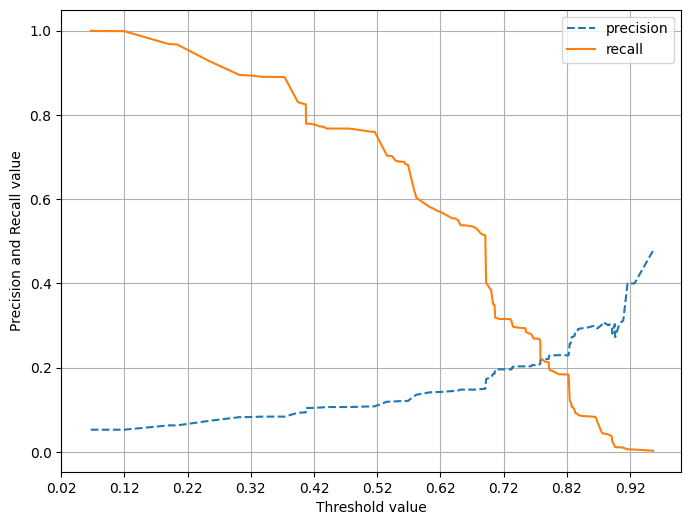

In [31]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## SGDClassifier

In [17]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss", max_iter=10)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7078343826848283
0.6706589198468242
오차 행렬
[[47835 23904]
 [ 1037  2954]]
정확도: 0.6707, 정밀도: 0.1100, 재현율: 0.7402, F1: 0.1915, AUC:0.7691


## SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 서대훈

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-2.8939165652334635

## LightGBM 

In [13]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105471419208189
0.656410933579823
오차 행렬
[[46554 25034]
 [  986  3156]]
정확도: 0.6564, 정밀도: 0.1120, 재현율: 0.7620, F1: 0.1952, AUC:0.7700


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105211755924352
0.6586293410801531
오차 행렬
[[46843 24883]
 [  969  3035]]
정확도: 0.6586, 정밀도: 0.1087, 재현율: 0.7580, F1: 0.1902, AUC:0.7665


# 손지호

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[50422 21270]
 [ 1173  2865]]
정확도: 0.7036, 정밀도: 0.1187, 재현율: 0.7095, F1: 0.2034, AUC:0.7772


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7084812306919853
0.707236233989172
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7764
분류 임계값 : 0.5
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7057
분류 임계값 : 0.55
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7003
분류 임계값 : 0.6
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.6906


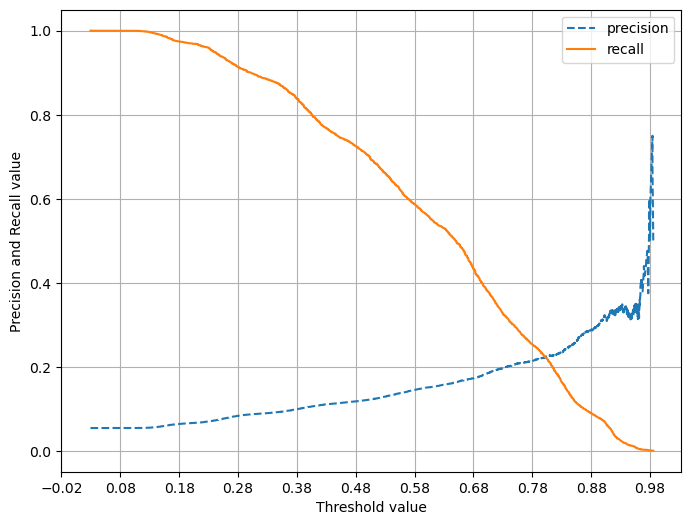

In [28]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.78, 0.8, 0.82]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7084812306919853
0.707236233989172
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7764
분류 임계값 : 0.78
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.6002
분류 임계값 : 0.8
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.5903
분류 임계값 : 0.82
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.5752


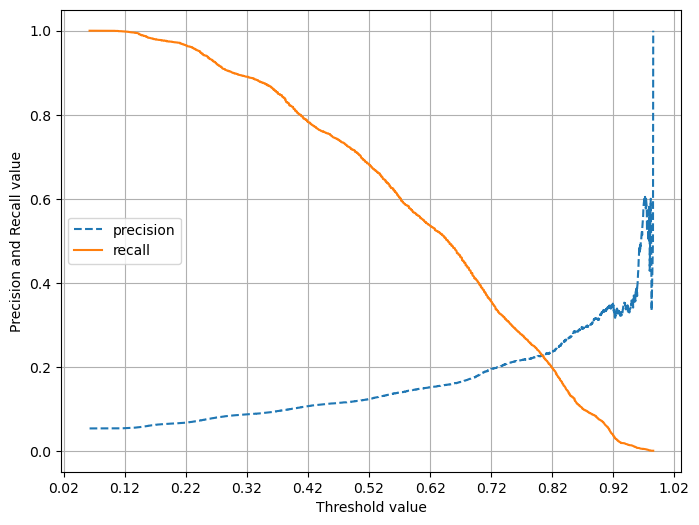

In [21]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [65]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1).to_numpy()
y = brfss["HEARTDISEASE"].to_numpy()

In [66]:
from sklearn.model_selection import train_test_split

#train_input, test_input, train_target, test_target = train_test_split(
#    fish_input, fish_target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train) # 훈련세트의 통계값으로
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test) # 테스트 세트를 반환

In [71]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, y_train)
print(kn.score(train_scaled, y_train))
print(kn.score(test_scaled, y_test))

0.9397818186940109
0.9343664828547886


In [72]:
print(kn.classes_)

[0. 1.]


In [73]:
print(kn.predict(test_scaled[:5]))

[0. 0. 1. 0. 0.]


In [74]:
import numpy as nmp
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.6667 0.3333]
 [1.     0.    ]
 [0.3333 0.6667]
 [1.     0.    ]
 [1.     0.    ]]


In [75]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(y_train[indexes])

[[0. 0. 0.]]


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
# 규제를 좀 완화하기 위해 C=20, 충분한 반복 학습을 위해 max_iter=1000
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, y_train)

LogisticRegression(C=20, max_iter=1000)

In [79]:
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9462610569609555
0.9468318860788912


In [51]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.827 0.173]
 [0.927 0.073]
 [0.812 0.188]
 [0.986 0.014]
 [0.989 0.011]]


In [52]:
data = np.round(proba, decimals=3)
predict_df = pd.DataFrame(data)
predict_df.columns = lr.classes_
predict_df

,0.0,1.0
0,0.827,0.173
1,0.927,0.073
2,0.812,0.188
3,0.986,0.014
4,0.989,0.011


In [53]:
# 각 열에 대한 클래스 명
lr.classes_

array([0., 1.])

In [82]:
print(lr.coef_.shape, lr.intercept_.shape)

(1, 9) (1,)


In [83]:
# 테스트데이터에 대한 z값
decision = lr.decision_function(test_scaled[:9])
print(decision)

[-1.56522536 -2.54760358 -1.46428163 -4.23080525 -4.46713907 -3.99752276
 -3.45966742 -3.33093839 -4.40929886]


In [85]:
from scipy.special import softmax
proba = softmax(decision, axis=0)
print(np.round(proba, decimals=3))

[0.325 0.122 0.36  0.023 0.018 0.029 0.049 0.056 0.019]


## XGBClassifier

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.764215930771565
0.7545754654694309
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.7264
분류 임계값 : 0.5
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6644
분류 임계값 : 0.55
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6502
분류 임계값 : 0.6
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6324


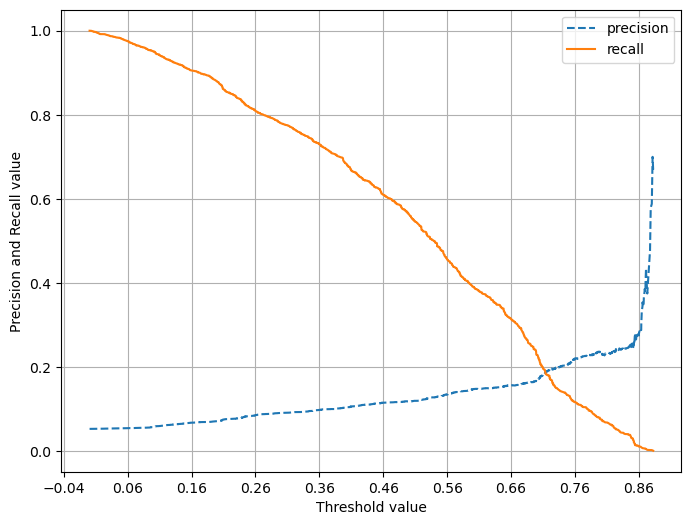

In [8]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [9]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.66, 0.71, 0.76]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.764215930771565
0.7545754654694309
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.7264
분류 임계값 : 0.66
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6093
분류 임계값 : 0.71
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.5738
분류 임계값 : 0.76
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.5467


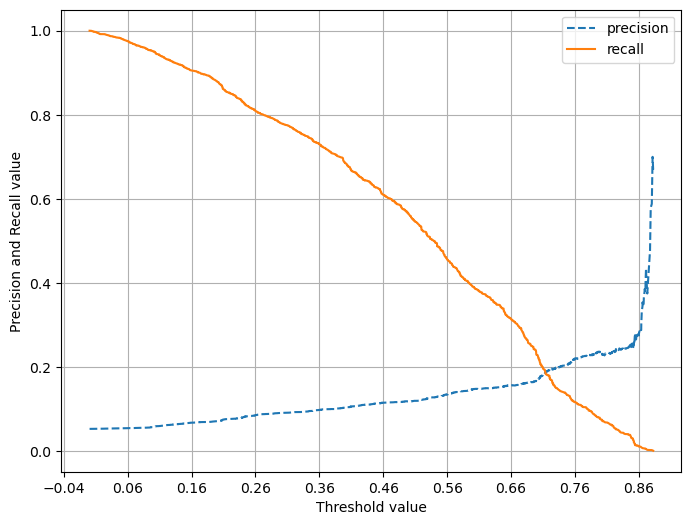

In [10]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## 강의 document
    - 머신러닝_5_3_1_XGBoost(eXtra Gradient Boost) 윗 부분

In [69]:
# 모듈 import
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [77]:
# 데이터 세트 로딩
dataset = brfss
X_features = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
y_label = brfss["HEARTDISEASE"]

In [81]:
# 데이터 확인하기 위해 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns=dataset.columns)
cancer_df['target']= y_label # 맨 마지막에 target 열 추가
cancer_df.head(3)

# target : 0 악성, 1 양성

,HEARTDISEASE,SEX,HEIGHT,WEIGHT,BLIND,DEAF,DIABETE,HYPERTENSION,KIDNEY,ALCOHOL,SMOKE,target
0,NaN,0,145.0,30.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
1,NaN,0,165.0,75.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0
2,NaN,0,160.0,85.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0


In [83]:
# 레이블 값 분포 확인
print(dataset.index)
print(cancer_df['target'].value_counts())

RangeIndex(start=0, stop=378646, step=1)
0.0    358424
1.0     20222
Name: target, dtype: int64


In [84]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286670
1.0    286670
Name: HEARTDISEASE, dtype: int64

In [91]:
# 학습용/테스트용 모두 변환해야 함
#dtrain = xgb.DMatrix(data=X_train, label=y_train,
#                     columns=dataset.columns)
#dtest = xgb.DMatrix(data=X_test, label=y_test,
#                     columns=dataset.columns)
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [92]:
# 파라미터 설정
params = {'max_depth': 3,
          'eta':0.1,#learning_rate
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'silent':0,
          'vervosity':0}
# 모델갯수
num_rounds = 400

In [93]:
## train 데이터 셋은 ‘train’ , evaluation 데이터 셋은 ‘eval'로 명기
wlist = [(dtrain,'train'),(dtest,'eval') ] # eval 평가용

In [94]:
# 모델학습
xgb_model = xgb.train(params=params,
                      dtrain=dtrain,
                      num_boost_round=num_rounds,
                      early_stopping_rounds=100,
                      evals=wlist)
# 211이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료 - 단 311까지 학습을 종료한 모델을 사용
# 211이 best여도 311까지는 학습을 해야 성능을 높일 수 있음

[16:39:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "vervosity" } are not used.

[0]	train-logloss:0.67183	eval-logloss:0.67221
[1]	train-logloss:0.65449	eval-logloss:0.65528
[2]	train-logloss:0.63966	eval-logloss:0.64116
[3]	train-logloss:0.62695	eval-logloss:0.62897
[4]	train-logloss:0.61669	eval-logloss:0.61911
[5]	train-logloss:0.60796	eval-logloss:0.61082
[6]	train-logloss:0.60010	eval-logloss:0.60328
[7]	train-logloss:0.59382	eval-logloss:0.59728
[8]	train-logloss:0.58800	eval-logloss:0.59168
[9]	train-logloss:0.58290	eval-logloss:0.58673
[10]	train-logloss:0.57866	eval-logloss:0.58268
[11]	train-logloss:0.57459	eval-logloss:0.57880
[12]	train-logloss:0.57081	eval-logloss:0.57493
[13]	train-logloss:0.56691	eval-logloss:0.57076
[14]	train-logloss:0.56417	eval-logloss:0.56809
[15]	train-logloss:0.56101	eval-logloss:0.56460
[16]	train-logloss:0.55876	eval-l

In [95]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))


predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.284 0.226 0.466 0.108 0.226 0.293 0.556 0.581 0.42  0.389]


In [96]:
# 예측 확률로 예측값이 반환 되므로 임계값을 정해 0또는 1로 변환해야 함
preds = [1 if x>0.5 else 0 for x in pred_probs]
print(np.round(preds[:10]))

[0 0 0 0 0 0 1 1 0 0]


#### XGBoost 모델의 예측 성능 평가

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [101]:
# 테스트 레이블 y_test 예측 레이블/예측확률 preds/pred_probs
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[54603 17151]
 [ 1672  2304]]
정확도: 0.7514, 정밀도: 0.1184, 재현율: 0.5795,    F1: 0.1967, AUC:0.7390


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

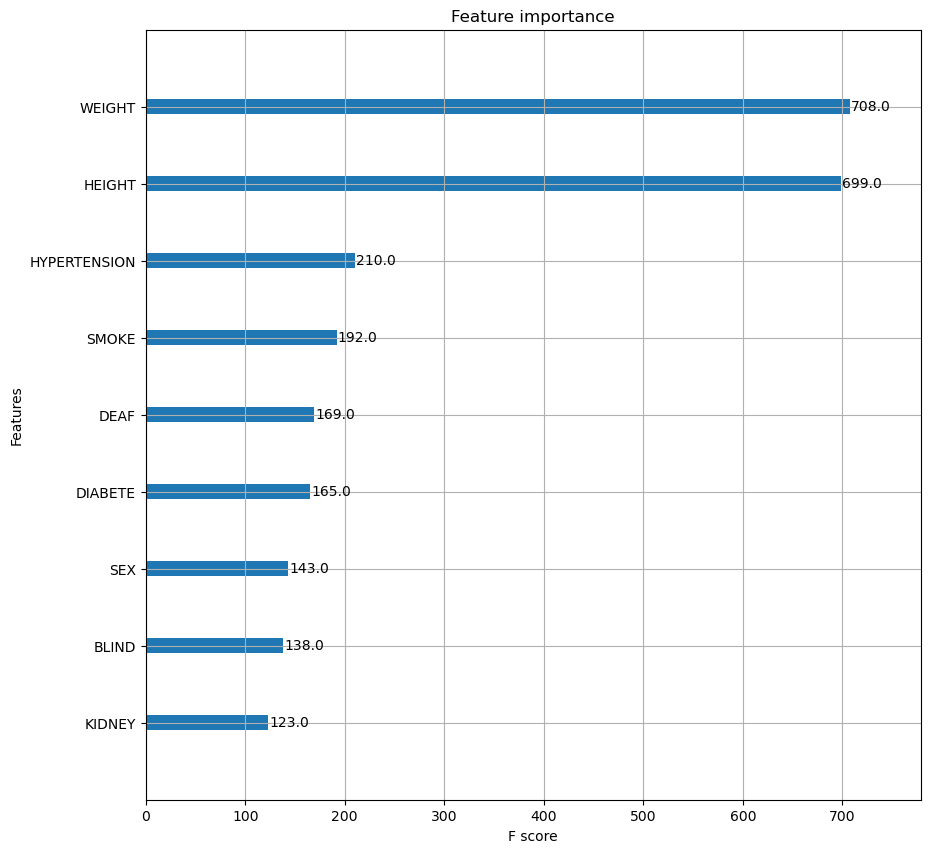

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10)) # 1개의 그래프 공간 생성
plot_importance(xgb_model, ax=ax)

## 강의 document
    - 머신러닝_5_3_1_XGBoost(eXtra Gradient Boost) 아랫 부분
        - 사이킷런 레퍼 XGBoost 클래스인 XGBClassifier 임포트

### early_stopping_rounds = 400

In [30]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 400, eval_set = evals, eval_metric = "logloss", verbose = True)
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61655
[1]	validation_0-logloss:0.55395
[2]	validation_0-logloss:0.50198
[3]	validation_0-logloss:0.45838
[4]	validation_0-logloss:0.42144
[5]	validation_0-logloss:0.38995
[6]	validation_0-logloss:0.36298
[7]	validation_0-logloss:0.33975
[8]	validation_0-logloss:0.31969
[9]	validation_0-logloss:0.30235
[10]	validation_0-logloss:0.28727
[11]	validation_0-logloss:0.27421
[12]	validation_0-logloss:0.26280
[13]	validation_0-logloss:0.25285
[14]	validation_0-logloss:0.24419
[15]	validation_0-logloss:0.23666
[16]	validation_0-logloss:0.23007
[17]	validation_0-logloss:0.22434
[18]	validation_0-logloss:0.21932
[19]	validation_0-logloss:0.21493
[20]	validation_0-logloss:0.21110
[21]	validation_0-logloss:0.20778
[22]	validation_0-logloss:0.20488
[23]	validation_0-logloss:0.20236
[24]	validation_0-logloss:0.20013
[25]	validation_0-logloss:0.19822
[26]	validation_0-logloss:0.19654
[27]	validation_0-logloss:0.19508
[28]	validation_0-logloss:0.19379
[29]	validation_0-loglos

In [33]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[71632     7]
 [ 4080    11]]
정확도: 0.9460, 정밀도: 0.6111, 재현율: 0.0027,    F1: 0.0054, AUC:0.7734


### early_stopping_rounds = 100

In [29]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', \
                eval_set = evals, verbose = True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61655
[1]	validation_0-logloss:0.55395
[2]	validation_0-logloss:0.50198
[3]	validation_0-logloss:0.45838
[4]	validation_0-logloss:0.42144
[5]	validation_0-logloss:0.38995
[6]	validation_0-logloss:0.36298
[7]	validation_0-logloss:0.33975
[8]	validation_0-logloss:0.31969
[9]	validation_0-logloss:0.30235
[10]	validation_0-logloss:0.28727
[11]	validation_0-logloss:0.27421
[12]	validation_0-logloss:0.26280
[13]	validation_0-logloss:0.25285
[14]	validation_0-logloss:0.24419
[15]	validation_0-logloss:0.23666
[16]	validation_0-logloss:0.23007
[17]	validation_0-logloss:0.22434
[18]	validation_0-logloss:0.21932
[19]	validation_0-logloss:0.21493
[20]	validation_0-logloss:0.21110
[21]	validation_0-logloss:0.20778
[22]	validation_0-logloss:0.20488
[23]	validation_0-logloss:0.20236
[24]	validation_0-logloss:0.20013
[25]	validation_0-logloss:0.19822
[26]	validation_0-logloss:0.19654
[27]	validation_0-logloss:0.19508
[28]	validation_0-logloss:0.19379
[29]	validation_0-loglos

In [32]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[71636     3]
 [ 4082     9]]
정확도: 0.9461, 정밀도: 0.7500, 재현율: 0.0022,    F1: 0.0044, AUC:0.7743


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

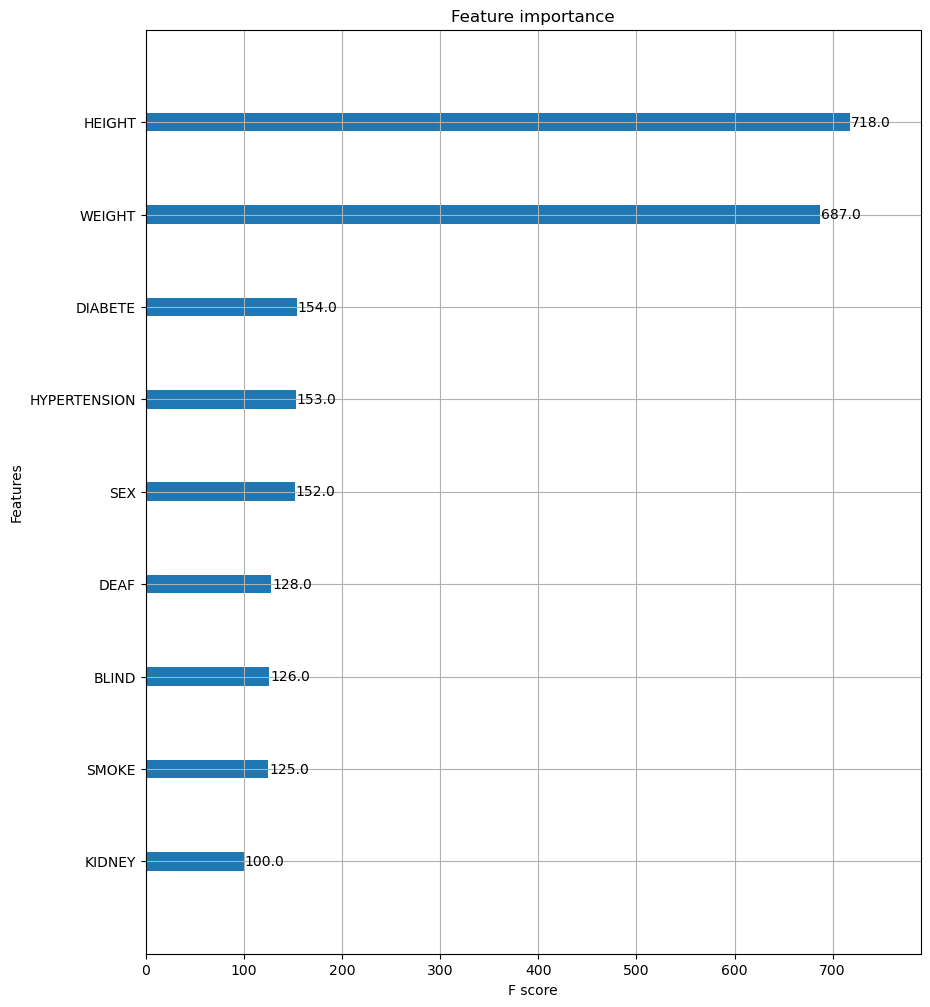

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_wrapper, ax = ax)

## XGBoost 적용
    - https://assaeunji.github.io/machine%20learning/2021-01-07-xgboost/ 참고

In [44]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

오차 행렬
[[71626    13]
 [ 4084     7]]
정확도: 0.9459, 정밀도: 0.3500, 재현율: 0.0017,    F1: 0.0034, AUC:0.7728


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

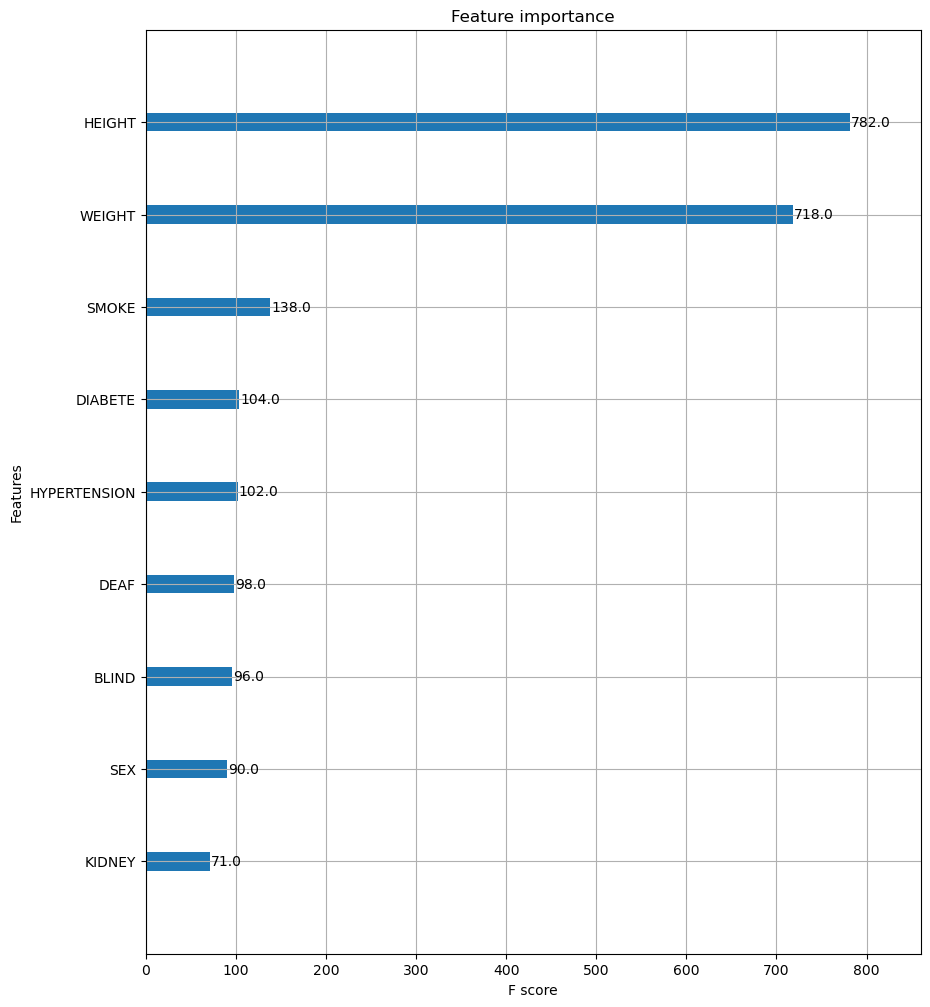

In [45]:
# train
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.3, max_depth = 3)
xgb.fit(X_train, y_train)

# prediction
w_pred = xgb.predict(X_test)
w_pred_proba = xgb.predict_proba(X_test)[:,1]

# confusion matrix
get_clf_eval(y_test, w_pred, w_pred_proba)

# importance plot
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb, ax=ax)

In [59]:
# 학습
xgb = XGBClassifier(n_estimators = 500, random_state = 156)
xgb.fit(X_train, y_train, early_stopping_rounds = 100,
       eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1],average = 'macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.7739

[0]	validation_0-auc:0.77286	validation_1-auc:0.76657
[1]	validation_0-auc:0.77502	validation_1-auc:0.76802
[2]	validation_0-auc:0.77636	validation_1-auc:0.76914
[3]	validation_0-auc:0.77661	validation_1-auc:0.76947
[4]	validation_0-auc:0.77766	validation_1-auc:0.77007
[5]	validation_0-auc:0.77775	validation_1-auc:0.76997
[6]	validation_0-auc:0.77819	validation_1-auc:0.77053
[7]	validation_0-auc:0.77902	validation_1-auc:0.77110
[8]	validation_0-auc:0.77953	validation_1-auc:0.77161
[9]	validation_0-auc:0.78017	validation_1-auc:0.77240
[10]	validation_0-auc:0.78073	validation_1-auc:0.77255
[11]	validation_0-auc:0.78121	validation_1-auc:0.77261
[12]	validation_0-auc:0.78224	validation_1-auc:0.77305
[13]	validation_0-auc:0.78256	validation_1-auc:0.77330
[14]	validation_0-auc:0.78313	validation_1-auc:0.77321
[15]	validation_0-auc:0.78344	validation_1-auc:0.77351
[16]	validation_0-auc:0.78378	validation_1-auc:0.77363
[17]	validation_0-auc:0.78437	validation_1-auc:0.77374
[18]	validation_0-au

In [60]:
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.7739


In [53]:
from sklearn.model_selection import GridSearchCV

# Grid Search
xgb = XGBClassifier(n_estimators = 100, random_state = 156)

# 하이퍼파라미터 후보
params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}
# folds = 3
gridcv = GridSearchCV(xgb, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],
    average='macro')

[0]	validation_0-auc:0.66942	validation_1-auc:0.66550
[1]	validation_0-auc:0.76109	validation_1-auc:0.75776
[2]	validation_0-auc:0.76242	validation_1-auc:0.75976
[3]	validation_0-auc:0.76607	validation_1-auc:0.76200
[4]	validation_0-auc:0.76377	validation_1-auc:0.76004
[5]	validation_0-auc:0.76928	validation_1-auc:0.76547
[6]	validation_0-auc:0.76613	validation_1-auc:0.76203
[7]	validation_0-auc:0.76619	validation_1-auc:0.76139
[8]	validation_0-auc:0.76836	validation_1-auc:0.76390
[9]	validation_0-auc:0.77694	validation_1-auc:0.77225
[10]	validation_0-auc:0.77768	validation_1-auc:0.77256
[11]	validation_0-auc:0.77646	validation_1-auc:0.77117
[12]	validation_0-auc:0.77783	validation_1-auc:0.77255
[13]	validation_0-auc:0.77796	validation_1-auc:0.77301
[14]	validation_0-auc:0.77815	validation_1-auc:0.77304
[15]	validation_0-auc:0.77888	validation_1-auc:0.77334
[16]	validation_0-auc:0.77921	validation_1-auc:0.77327
[17]	validation_0-auc:0.77903	validation_1-auc:0.77302
[18]	validation_0-au

In [57]:
print('Optimized hyperparameters', gridcv.best_params_) 
#{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.7731

Optimized hyperparameters {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}
ROC AUC: 0.7731


## XGBRegressor
    - https://github.com/rickiepark/handson-gb/blob/main/Chapter01/Gradient_Boosting_in_Machine_Learning.ipynb 참고

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.21969418038145097

In [38]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor의 객체 xg_reg를 만듭니다.
xg_reg = XGBRegressor()

# 훈련 데이터로 xg_reg 객체를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트의 레이블을 예측합니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 0.22


## XGBoost 교차 검증

In [42]:
# cross_val_score 함수를 임포트합니다.
from sklearn.model_selection import cross_val_score

In [43]:
# XGBRegressor 객체를 만듭니다.
model = XGBRegressor(objective="reg:squarederror")

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# 이 점수의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('회귀 rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

회귀 rmse: [0.21 0.21 0.22 0.22 0.22 0.21 0.23 0.22 0.21 0.22]
RMSE 평균: 0.22


## KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.65]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.6481557691502867
0.9305691271622871
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.6197
분류 임계값 : 0.5
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5333
분류 임계값 : 0.55
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5333
분류 임계값 : 0.65
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5197


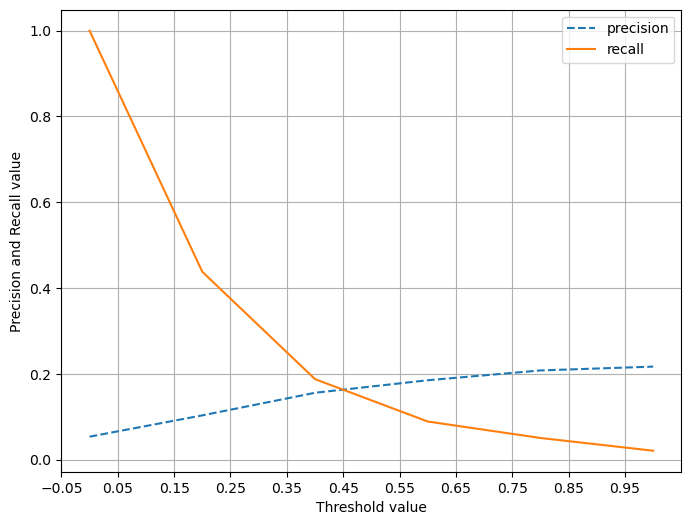

In [31]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.40, 0.45, 0.5]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.6481557691502867
0.9305691271622871
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.6197
분류 임계값 : 0.4
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5333
분류 임계값 : 0.45
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5333
분류 임계값 : 0.5
오차 행렬
[[70114  1578]
 [ 3680   358]]
정확도: 0.9306, 정밀도: 0.1849, 재현율: 0.0887, F1: 0.1199, AUC:0.5333


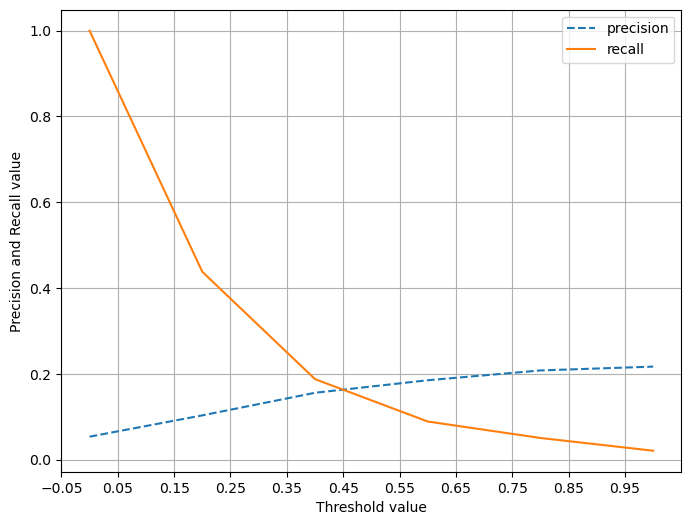

In [33]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#train_input, test_input, train_target, test_target

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286672
1.0    286672
Name: HEARTDISEASE, dtype: int64

In [105]:
print(X_train.shape, X_test.shape)

(573344, 9) (75730, 9)


In [106]:
# shape 속성 - 튜플구조를 반환
test_array = np.array([1,2,3,4])
test_array.shape[0]

4

In [107]:
# reshape() :  데이터의 차원을 변경하는 함수
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [108]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [109]:
print(X_train.shape, X_test.shape)

(5160096, 1) (681570, 1)


In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [5160096, 573344]

In [112]:
knr.score(X_test, y_test)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [85]:
from sklearn.metrics import mean_absolute_error

In [87]:
# 테스트 세트에 대한 예측을 만듭니다
test_pred = knr.predict(X_test)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_pred)
mae

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

In [90]:
print(train_input.shape, test_input.shape)

(283984, 9) (94662, 9)


In [91]:
# shape 속성 - 튜플구조를 반환
test_array = np.array([1,2,3,4])
test_array.shape[0]

4

In [92]:
# reshape() :  데이터의 차원을 변경하는 함수
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [94]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)

In [95]:
print(train_input.shape, test_input.shape)

(2555856, 1) (851958, 1)


In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
knr.score(test_input, test_target) # 회귀모델(KNN)의 기본 평가지표는 R2값임

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
from sklearn.metrics import mean_absolute_error

In [99]:
# 테스트 세트에 대한 예측을 만듭니다
test_pred = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_pred)
mae

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.